# Step 4: Model Development

---

## 1. Importing the necessary libraries📗

In [81]:
# Imports library for data manipulation and visualisation
import sys
sys.path.append("../utilities")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from color import color
import warnings
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.impute import KNNImputer
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# ignore all warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## 2. Data Preparation


In [27]:
df_train = pd.read_csv("../dataset/processed_train.csv")
df_test = pd.read_csv("../dataset/processed_test.csv")

In [3]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133275 entries, 0 to 133274
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                133275 non-null  int64  
 1   HighChol              133275 non-null  int64  
 2   BMI                   133275 non-null  float64
 3   Smoker                133275 non-null  int64  
 4   Stroke                133275 non-null  int64  
 5   HeartDiseaseorAttack  133275 non-null  int64  
 6   PhysActivity          133275 non-null  int64  
 7   Fruits                133275 non-null  int64  
 8   Veggies               133275 non-null  int64  
 9   HvyAlcoholConsump     133275 non-null  int64  
 10  NoDocbcCost           133275 non-null  int64  
 11  GenHlth               133275 non-null  float64
 12  MentHlth              133275 non-null  int64  
 13  PhysHlth              133275 non-null  int64  
 14  DiffWalk              133275 non-null  int64  
 15  

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,133275.000000,133275.000000,1.332750e+05,133275.000000,133275.000000,133275.000000,133275.000000,133275.000000,133275.000000,133275.000000,...,1.332750e+05,133275.000000,133275.000000,133275.000000,133275.000000,1.332750e+05,1.332750e+05,1.332750e+05,1.332750e+05,133275.000000
mean,0.492613,0.473877,4.179820e-17,0.459403,0.050775,0.119925,0.730722,0.625181,0.800360,0.050467,...,5.800566e-17,0.205080,0.267522,0.209574,0.447676,3.565642e-16,1.505588e-16,8.530245e-18,-2.388469e-17,0.400120
std,0.499947,0.499319,1.000004e+00,0.498351,0.219538,0.324875,0.443586,0.484078,0.399731,0.218908,...,1.000004e+00,0.403761,0.442669,0.407006,0.497257,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489924
min,0.000000,0.000000,-2.485713e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.512831e+00,0.000000,0.000000,0.000000,0.000000,-2.456936e+00,-2.287149e+00,-2.600881e+00,-2.607127e+00,0.000000
25%,0.000000,0.000000,-7.367234e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-6.071059e-01,0.000000,0.000000,0.000000,0.000000,-7.765912e-01,-8.803793e-01,-6.186323e-01,-6.203128e-01,0.000000
50%,0.000000,0.000000,-1.537269e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,2.986191e-01,0.000000,0.000000,0.000000,0.000000,2.316159e-01,5.746706e-02,-1.808350e-01,-1.815073e-01,0.000000
75%,1.000000,1.000000,4.292696e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,2.986191e-01,0.000000,1.000000,0.000000,1.000000,5.676849e-01,9.953134e-01,8.285311e-01,8.301832e-01,1.000000
max,1.000000,1.000000,1.004871e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.110069e+00,1.000000,1.000000,1.000000,1.000000,1.575892e+00,9.953134e-01,2.239211e+00,2.244112e+00,1.000000


In [4]:
df_train.head

<bound method NDFrame.head of         HighBP  HighChol       BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0            0         0 -1.028222       0       0                     0   
1            1         1 -0.445225       0       0                     0   
2            0         1  7.279479       0       0                     0   
3            0         1 -0.445225       0       0                     0   
4            1         0  0.866517       1       0                     0   
...        ...       ...       ...     ...     ...                   ...   
133270       1         0 -0.590974       1       0                     0   
133271       1         1 -1.319720       0       0                     1   
133272       1         1 -0.299476       1       0                     0   
133273       0         0  0.429270       1       0                     1   
133274       1         1 -1.028222       1       0                     1   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump 

In [5]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50686 entries, 0 to 50685
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                50686 non-null  int64  
 1   HighChol              50686 non-null  int64  
 2   BMI                   50686 non-null  float64
 3   Smoker                50686 non-null  int64  
 4   Stroke                50686 non-null  int64  
 5   HeartDiseaseorAttack  50686 non-null  int64  
 6   PhysActivity          50686 non-null  int64  
 7   Fruits                50686 non-null  int64  
 8   Veggies               50686 non-null  int64  
 9   HvyAlcoholConsump     50686 non-null  int64  
 10  NoDocbcCost           50686 non-null  int64  
 11  GenHlth               50686 non-null  float64
 12  MentHlth              50686 non-null  int64  
 13  PhysHlth              50686 non-null  int64  
 14  DiffWalk              50686 non-null  int64  
 15  Sex                

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,50686.000000,50686.000000,5.068600e+04,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,...,5.068600e+04,50686.000000,50686.000000,50686.000000,50686.000000,5.068600e+04,5.068600e+04,5.068600e+04,5.068600e+04,0.0
mean,0.430494,0.423470,-4.612724e-15,0.445646,0.039518,0.093438,0.757270,0.629503,0.810875,0.057393,...,-3.420519e-16,0.189875,0.231701,0.166456,0.443673,2.371934e-16,-1.405006e-16,-1.780352e-17,3.336408e-17,NaN
std,0.495150,0.494113,1.000010e+00,0.497042,0.194825,0.291048,0.428737,0.482943,0.391612,0.232593,...,1.000010e+00,0.392206,0.421923,0.372493,0.496822,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,NaN
min,0.000000,0.000000,-5.910515e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.604766e+00,0.000000,0.000000,0.000000,0.000000,-2.114380e+00,-1.926688e+00,-2.528539e+00,-2.515536e+00,NaN
25%,0.000000,0.000000,-6.720110e-01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,-3.743119e-01,0.000000,0.000000,0.000000,0.000000,-6.940724e-01,-6.951760e-01,-6.323014e-01,-6.378422e-01,NaN
50%,0.000000,0.000000,-4.817951e-02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-3.743119e-01,0.000000,0.000000,0.000000,0.000000,-4.237341e-02,3.946181e-01,1.477111e-01,1.534715e-01,NaN
75%,1.000000,1.000000,6.088137e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,5.537677e-01,0.000000,0.000000,0.000000,1.000000,6.392034e-01,1.047405e+00,5.915113e-01,5.826586e-01,NaN
max,1.000000,1.000000,3.858817e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.003797e+00,1.000000,1.000000,1.000000,1.000000,1.706932e+00,1.047405e+00,2.823961e+00,2.822479e+00,NaN


Data splitting

In [28]:
x = df_train.drop(["Status"], axis=1)
y = df_train[["Status"]]

# Splitting our training data into a train set and a validation set
x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    shuffle=True,
    random_state=0,  # Ensure reproducible results
    test_size=0.2    # 80 - 20
)

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")

x_train: (106620, 20)
y_train: (106620, 1)
x_val: (26655, 20)
y_val: (26655, 1)


Creating K-Fold cross validation hyperparameter.

In [29]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=0)

## 3. Logistic Regression 


### 3.1 Setting Hyperparameters

- Degree of freedom C = 1/$\lambda$
- Regularization type: L1 and L2

In [22]:
hyper_para = {
    "C": 1 / np.logspace(-2, 2, num=25),
    "penalty": ["l1", "l2"]
}

In [23]:
log_reg = LogisticRegression(random_state=0, solver='saga', max_iter=1000, class_weight='balanced')

In [24]:
clfs_perf = dict()

We will use grid search to train our classifier for each of those lambda values and evaluate their performance

### 3.2 Linear Logistic Regression (1st Degree)

In [11]:
grid_clf = GridSearchCV(log_reg, hyper_para, cv=cross_val, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True, n_jobs=-1) # n_jobs = 1 use all CPU, becareful to freeze your computer
grid_clf.fit(x_train, y_train.values.ravel())

y_train_pred = grid_clf.predict(x_train)
y_val_pred = grid_clf.predict(x_val)
clfs_perf["log_reg_1"] = grid_clf

Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best score: 0.8501752723748016
Params with least gap between train and validation scores: {'C': 0.01, 'penalty': 'l1'}
Train score with least gap: 0.8497970635502039
Validation score with least gap: 0.8497652708222286


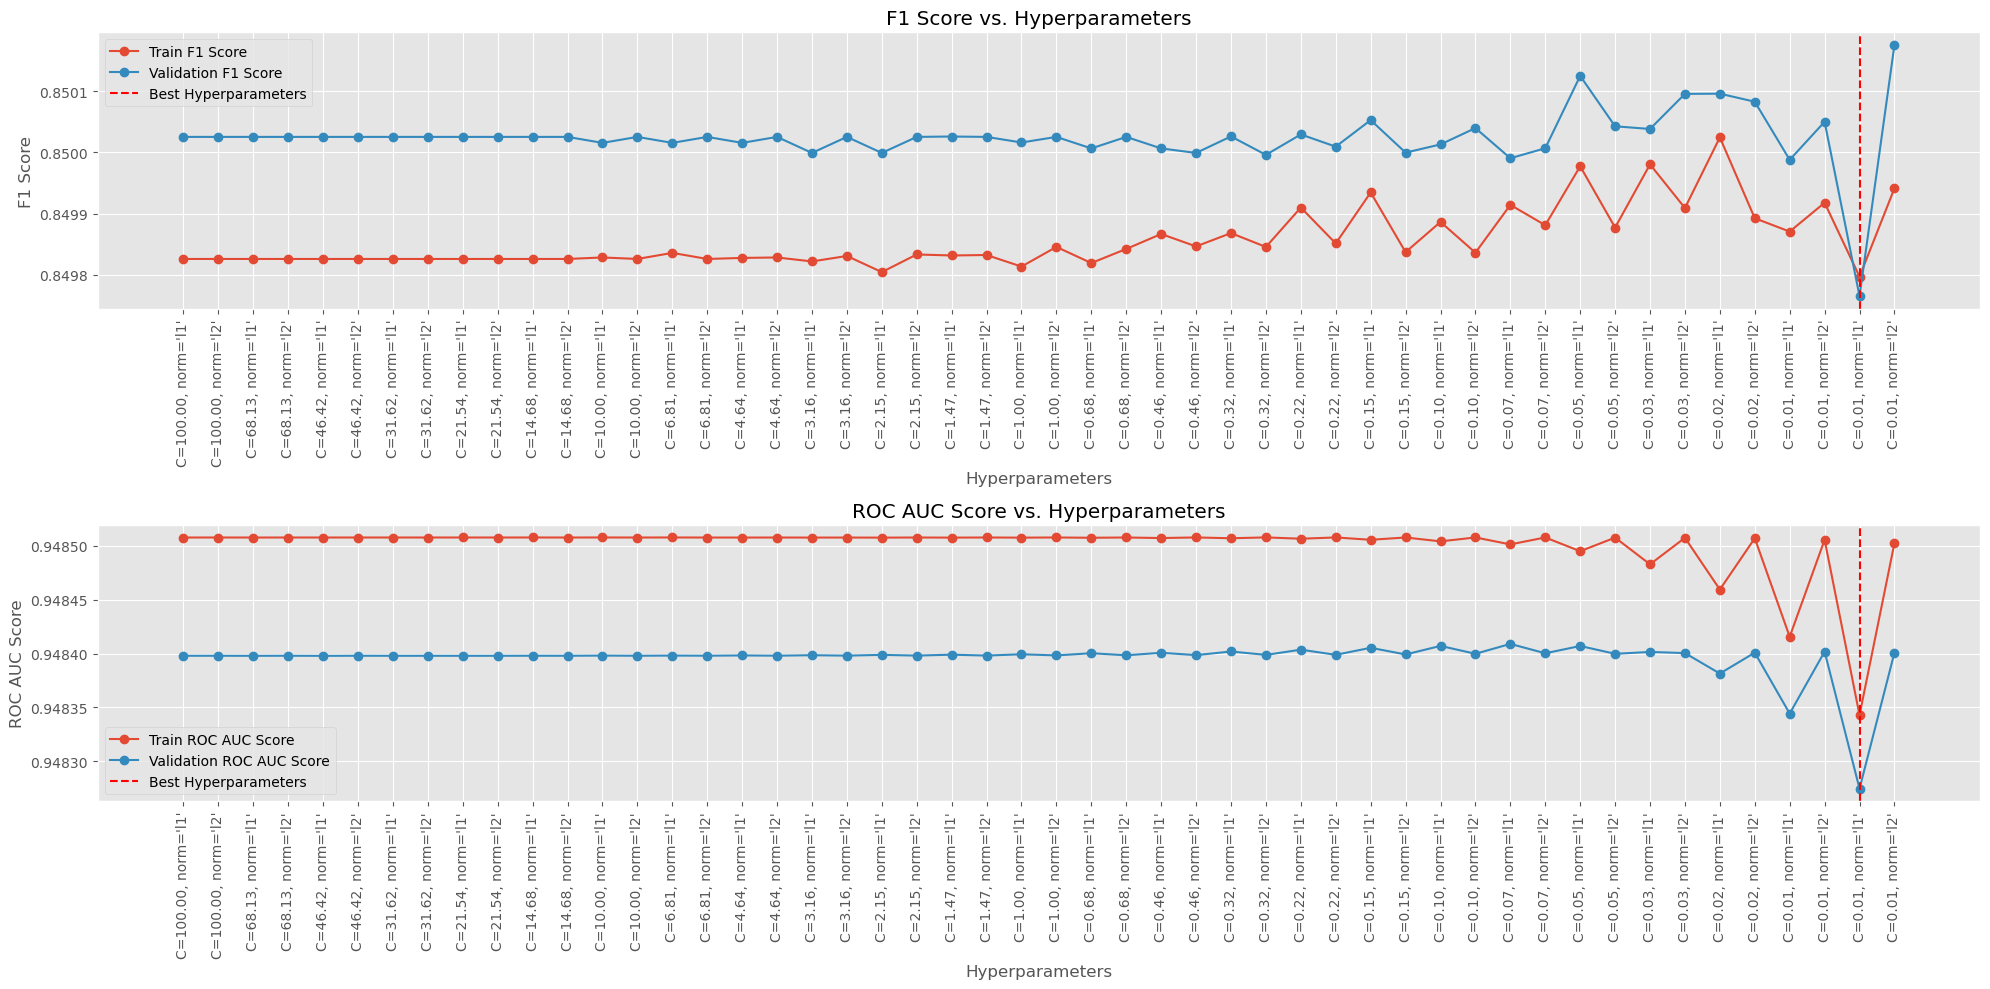

In [12]:
def visualize_cls(grid_clf):  
    # Extracting the results from grid search
    train_f1_scores = grid_clf.cv_results_['mean_train_f1']
    val_f1_scores = grid_clf.cv_results_['mean_test_f1']
    train_roc_auc_scores = grid_clf.cv_results_['mean_train_roc_auc']
    val_roc_auc_scores = grid_clf.cv_results_['mean_test_roc_auc']
    hyper_params = grid_clf.cv_results_['params']

    # Extracting and formatting hyperparameter labels
    hyper_param_labels = [f"C={param['C']:.2f}, norm='{param['penalty']}'" for param in hyper_params]

    # Calculate the absolute difference between train and validation scores
    score_diff = np.abs(train_f1_scores - val_f1_scores)

    # Find the index where the difference is minimized
    least_gap_index = np.argmin(score_diff)

    least_gap_params = grid_clf.cv_results_['params'][least_gap_index]

    print("Best parameters:", grid_clf.best_params_)
    print("Best score:", grid_clf.best_score_)
    print("Params with least gap between train and validation scores:", least_gap_params)
    print("Train score with least gap:", grid_clf.cv_results_['mean_train_f1'][least_gap_index])
    print("Validation score with least gap:", grid_clf.cv_results_['mean_test_f1'][least_gap_index])

    # Plotting F1 scores
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(hyper_params)), train_f1_scores, label='Train F1 Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_f1_scores, label='Validation F1 Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=least_gap_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    # Plotting ROC AUC scores
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(hyper_params)), train_roc_auc_scores, label='Train ROC AUC Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_roc_auc_scores, label='Validation ROC AUC Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('ROC AUC Score')
    plt.title('ROC AUC Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=least_gap_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
visualize_cls(grid_clf)

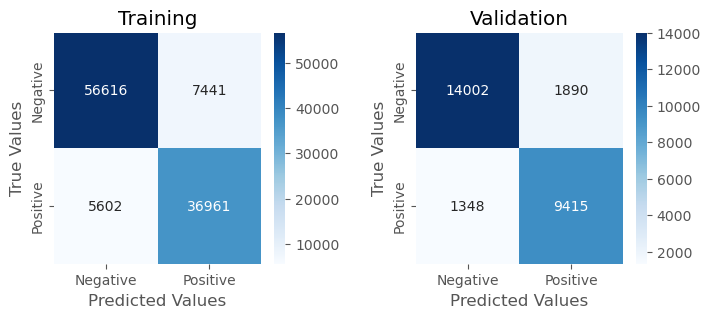

Training Dataset
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     64057
           1       0.83      0.87      0.85     42563

    accuracy                           0.88    106620
   macro avg       0.87      0.88      0.87    106620
weighted avg       0.88      0.88      0.88    106620

Validation Dataset
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     15892
           1       0.83      0.87      0.85     10763

    accuracy                           0.88     26655
   macro avg       0.87      0.88      0.87     26655
weighted avg       0.88      0.88      0.88     26655



In [13]:
def show_train_val_confusion_matrix(train_y, train_pred_y, val_y, val_pred_y):
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    sns.heatmap(confusion_matrix(train_y, train_pred_y), annot=True, cmap="Blues", fmt="g", ax=axis[0])
    axis[0].set_xlabel("Predicted Values")
    axis[0].set_ylabel("True Values")
    axis[0].set_title("Training")

    axis[0].set_xticks([0.5, 1.5])
    axis[0].set_xticklabels(["Negative", "Positive"])
    axis[0].set_yticks([0.5, 1.5])
    axis[0].set_yticklabels(["Negative", "Positive"])

    sns.heatmap(confusion_matrix(val_y, val_pred_y), annot=True, cmap="Blues", fmt="g", ax=axis[1])
    axis[1].set_xlabel("Predicted Values")
    axis[1].set_ylabel("True Values")
    axis[1].set_title("Validation")

    axis[1].set_xticks([0.5, 1.5])
    axis[1].set_xticklabels(["Negative", "Positive"])
    axis[1].set_yticks([0.5, 1.5])
    axis[1].set_yticklabels(["Negative", "Positive"])

    fig.subplots_adjust(wspace=0.4)

    plt.show()

    print(color.RED + color.BOLD + "Training Dataset" + color.END)
    print(f"{classification_report(train_y, train_pred_y)}")
    print(color.BLUE + color.BOLD + "Validation Dataset" + color.END)
    print(f"{classification_report(val_y, val_pred_y)}")
    
show_train_val_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

### 3.3 Polynomial Logistic Regression (2nd Degree)

In [18]:
# Degree 2 Polynomial Features:
poly = PolynomialFeatures(2)
x_train_poly_2 = poly.fit_transform(x_train)
x_val_poly_2 = poly.transform(x_val)

In [19]:
grid_clf = GridSearchCV(log_reg, hyper_para, cv=cross_val, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True, n_jobs=-1)
grid_clf.fit(x_train_poly_2, y_train.values.ravel())

y_train_pred = grid_clf.predict(x_train_poly_2)
y_val_pred = grid_clf.predict(x_val_poly_2)
clfs_perf["log_reg_2"] = grid_clf

Best parameters: {'C': 0.021544346900318846, 'penalty': 'l2'}
Best score: 0.8668682525500472
Params with least gap between train and validation scores: {'C': 0.014677992676220705, 'penalty': 'l1'}
Train score with least gap: 0.865819817449602
Validation score with least gap: 0.8654414148628332


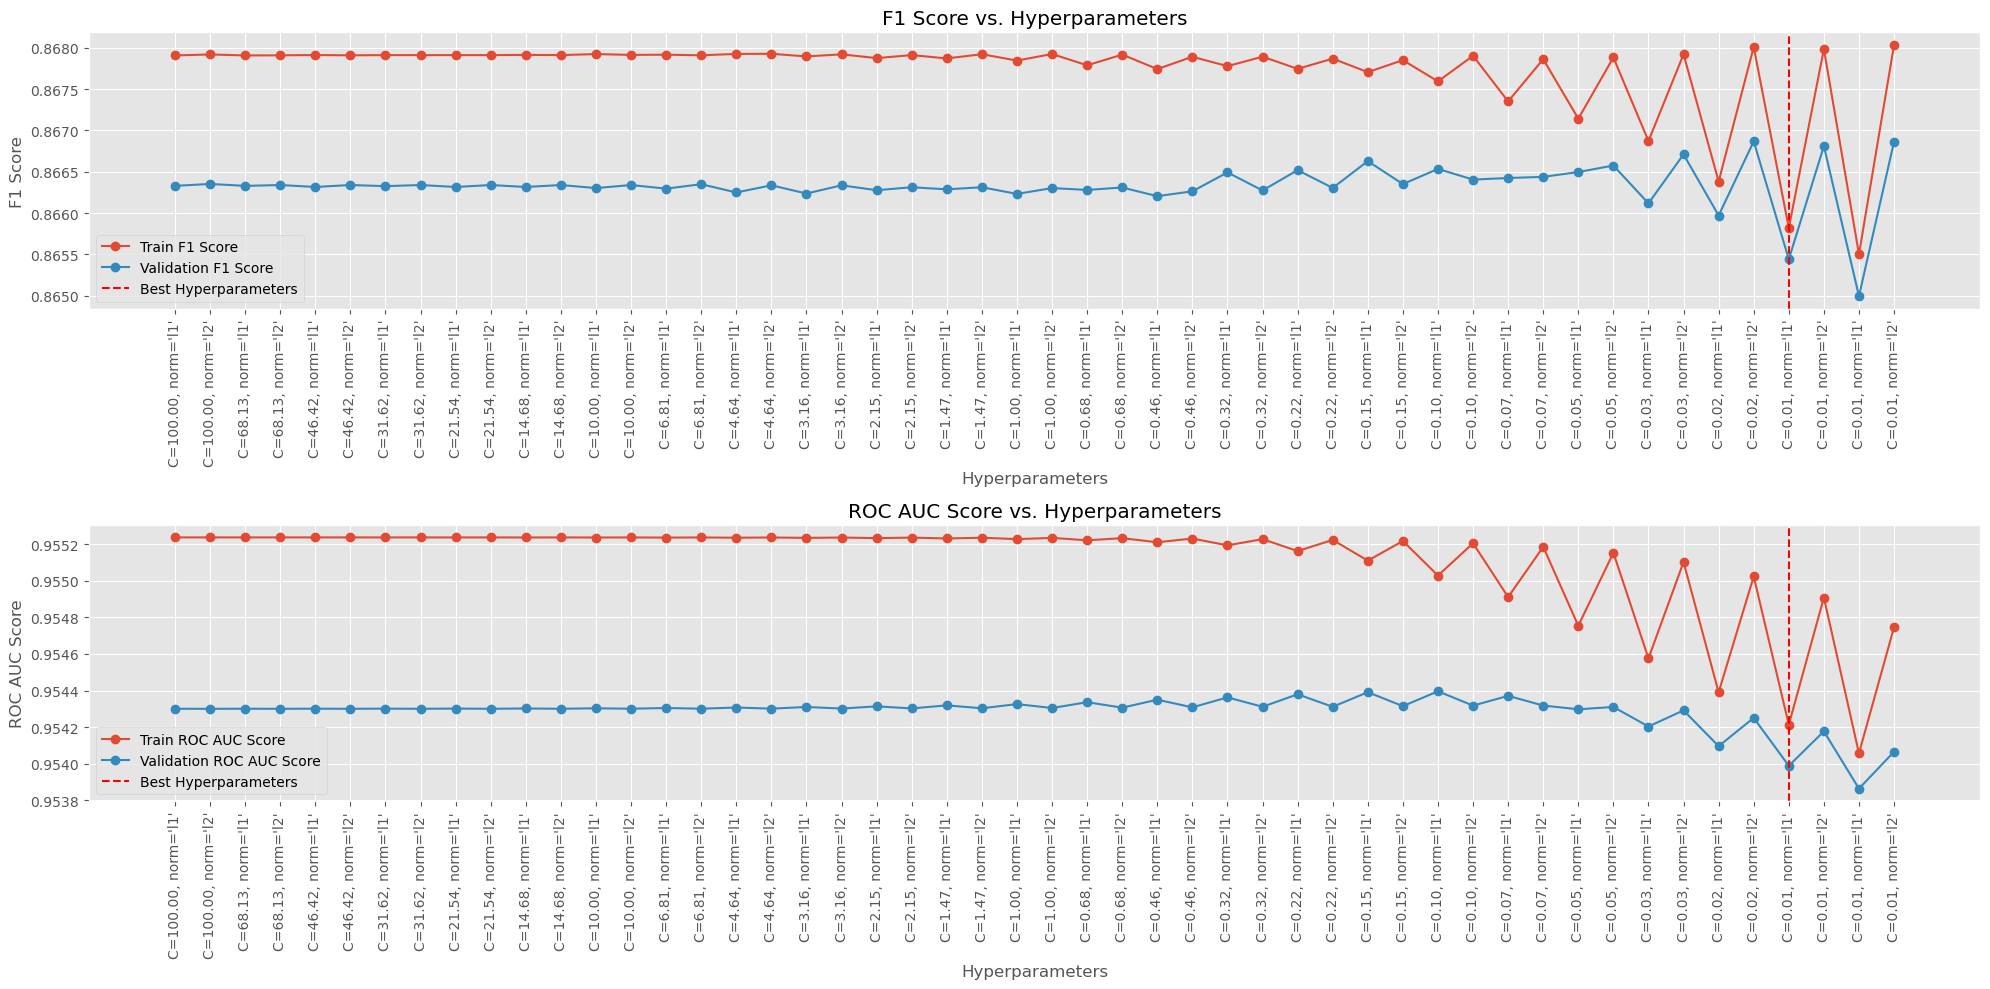

In [20]:
visualize_cls(grid_clf)

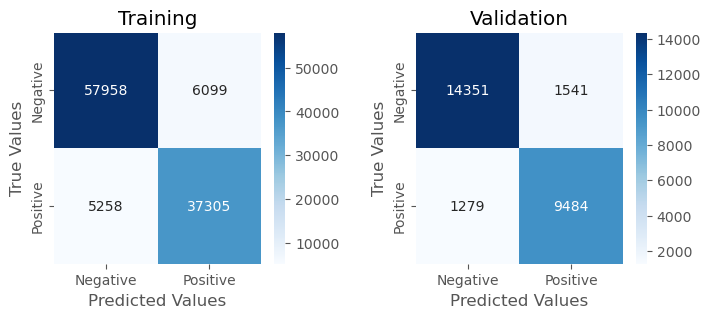

Training Dataset
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     64057
           1       0.86      0.88      0.87     42563

    accuracy                           0.89    106620
   macro avg       0.89      0.89      0.89    106620
weighted avg       0.89      0.89      0.89    106620

Validation Dataset
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     15892
           1       0.86      0.88      0.87     10763

    accuracy                           0.89     26655
   macro avg       0.89      0.89      0.89     26655
weighted avg       0.89      0.89      0.89     26655



In [21]:
show_train_val_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

### 3.4 Polynomial Logistic Regression (3rd Degree)

In [ ]:
# Degree 3 Polynomial Features:
poly = PolynomialFeatures(3)
x_train_poly_3 = poly.fit_transform(x_train)
x_val_poly_3 = poly.transform(x_val)

In [ ]:
grid_clf = GridSearchCV(log_reg, hyper_para, cv=cross_val, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True, n_jobs=-1)
grid_clf.fit(x_train_poly_3, y_train.values.ravel())

y_train_pred = grid_clf.predict(x_train_poly_3)
y_val_pred = grid_clf.predict(x_val_poly_3)
clfs_perf["log_reg_3"] = grid_clf

In [ ]:
visualize_cls(grid_clf)

In [ ]:
show_train_val_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

## 4. Decision Tree

### 4.1 Setting Hyperparameters

In [31]:
hyper_para = {
    "max_depth": np.arange(2, 24, 2),
    "min_samples_split": np.arange(2, 10, 2),
    "criterion": ['gini', 'entropy']
}

### 4.2 Decision Tree Model

In [33]:
decision_tree_clf = DecisionTreeClassifier(
    random_state=0            # Reproducible result
)

grid_clf = GridSearchCV(decision_tree_clf, hyper_para, cv=cross_val, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True, n_jobs=-1)
grid_clf.fit(x_train, y_train.values.ravel())

y_train_pred = grid_clf.predict(x_train)
y_val_pred = grid_clf.predict(x_val)
clfs_perf["decision_tree"] = grid_clf

Params with highest score: {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 2}
Params with best combine score between train and validation scores: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}
Train score with best parameters: 0.9067393691625089
Validation score with best parameters: 0.9043541192865077


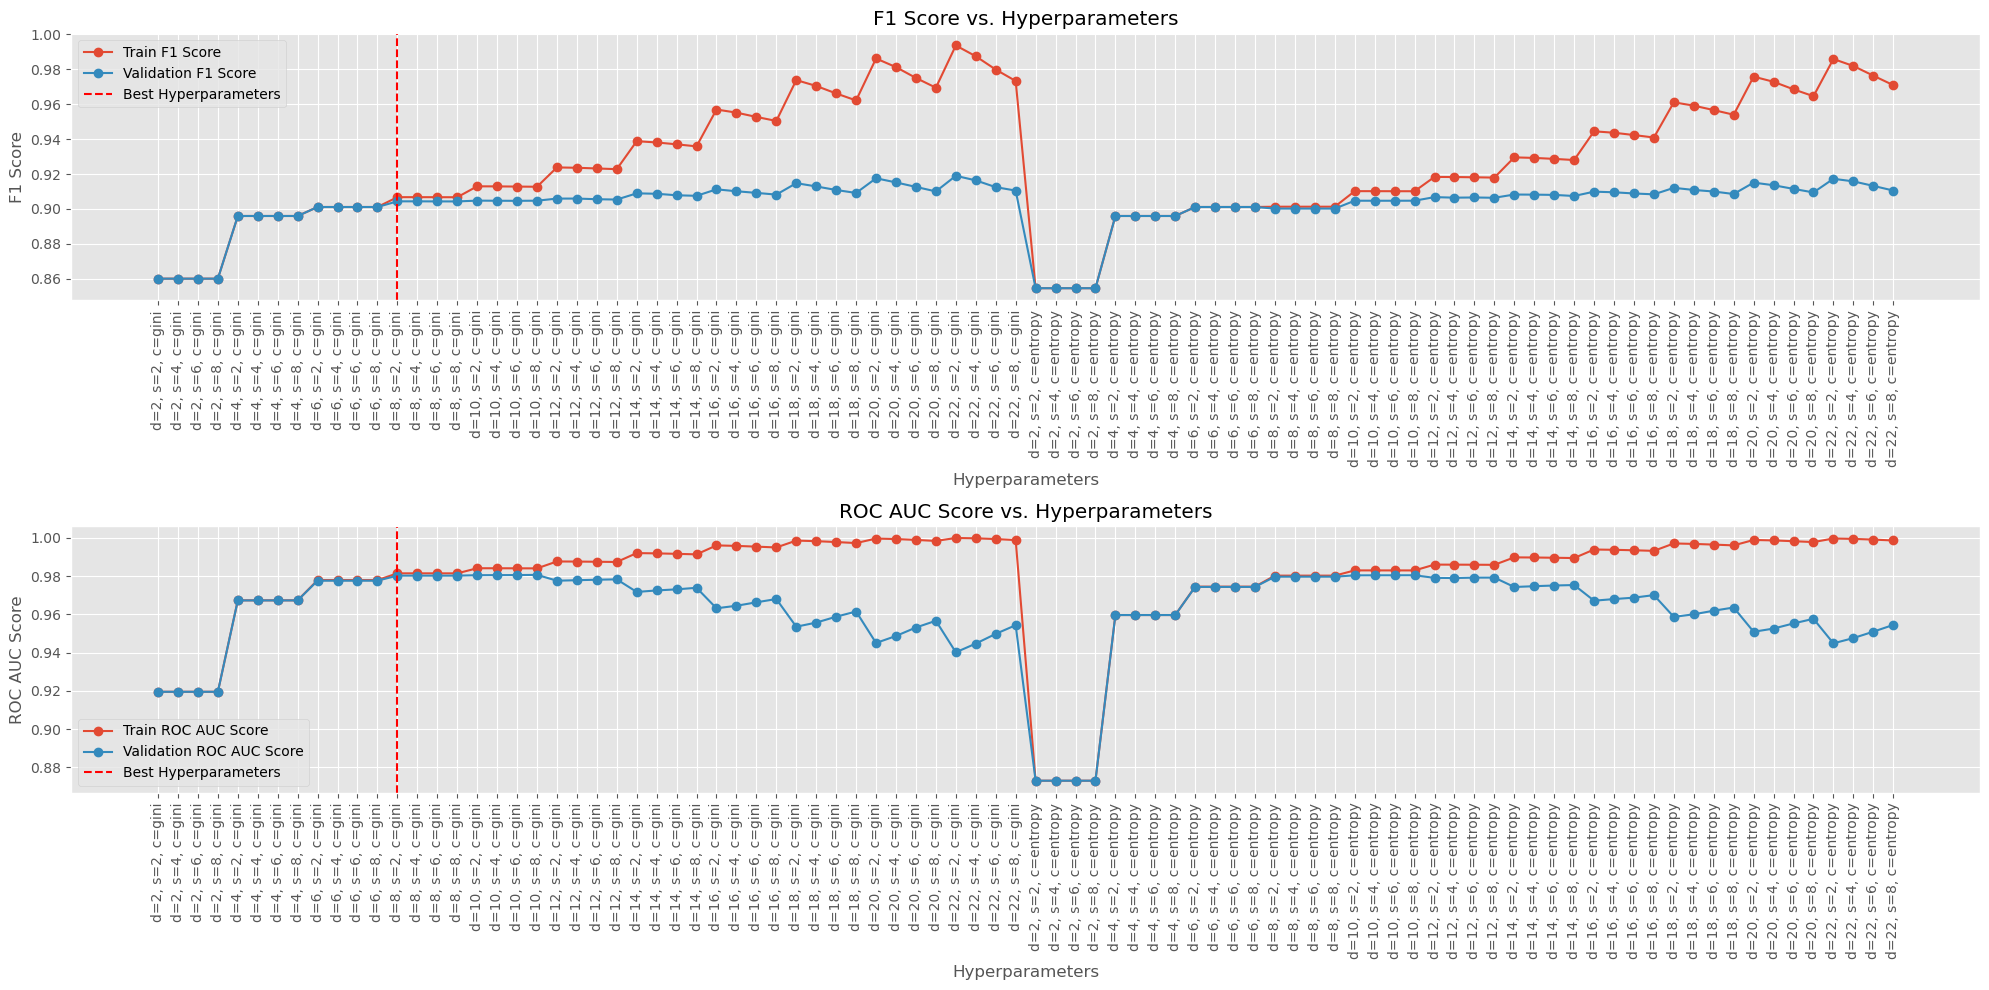

In [54]:
def visualize_cls(grid_clf):
    # Extracting the results from grid search
    train_f1_scores = grid_clf.cv_results_['mean_train_f1']
    val_f1_scores = grid_clf.cv_results_['mean_test_f1']
    train_roc_auc_scores = grid_clf.cv_results_['mean_train_roc_auc']
    val_roc_auc_scores = grid_clf.cv_results_['mean_test_roc_auc']
    hyper_params = grid_clf.cv_results_['params']

    # Calculate the absolute difference between train and validation scores
    score_diff = np.abs(train_f1_scores - val_f1_scores)

    # Define a scoring function that combines gap and score
    combined_scores = val_f1_scores - 0.5 * score_diff

    # Find the index where the combined score is maximized
    best_index = np.argmax(combined_scores)
    best_params = hyper_params[best_index]
    
    hyper_param_labels = [f"d={param['max_depth']}, s={param['min_samples_split']}, c={param['criterion']}" for param in hyper_params]


    print("Params with highest score:", grid_clf.best_params_)
    # print("Best combined score:", combined_scores[best_index])
    print("Params with best combine score between train and validation scores:", best_params)
    print("Train score with best parameters:", train_f1_scores[best_index])
    print("Validation score with best parameters:", val_f1_scores[best_index])

    # Plotting F1 scores
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(hyper_params)), train_f1_scores, label='Train F1 Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_f1_scores, label='Validation F1 Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=best_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    # Plotting ROC AUC scores
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(hyper_params)), train_roc_auc_scores, label='Train ROC AUC Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_roc_auc_scores, label='Validation ROC AUC Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('ROC AUC Score')
    plt.title('ROC AUC Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=best_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
visualize_cls(grid_clf)

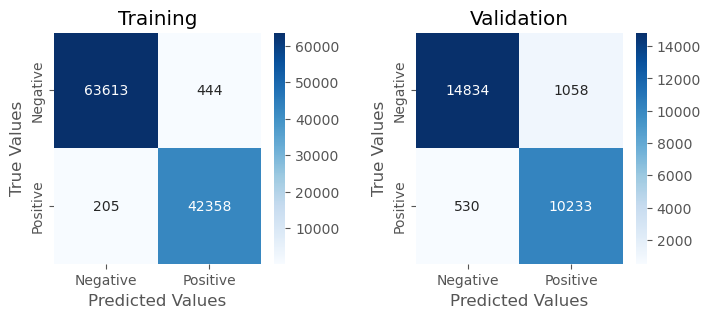

Training Dataset
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     64057
           1       0.99      1.00      0.99     42563

    accuracy                           0.99    106620
   macro avg       0.99      0.99      0.99    106620
weighted avg       0.99      0.99      0.99    106620

Validation Dataset
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     15892
           1       0.91      0.95      0.93     10763

    accuracy                           0.94     26655
   macro avg       0.94      0.94      0.94     26655
weighted avg       0.94      0.94      0.94     26655



In [55]:
show_train_val_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

## 5. Random Forest

### 5.1 Setting Hyperparameters

In [58]:
hyper_para = {
    "n_estimators": np.arange(5, 25, 5),
    "max_depth": np.arange(2, 24, 2),
    "criterion": ['gini', 'entropy'],
    "max_features": ['auto', 'sqrt', 'log2'],
}

### 5.2 Random Forest Model

In [68]:
random_forest_clf = RandomForestClassifier(
    random_state=0     # Reproducible result
)

grid_clf = GridSearchCV(random_forest_clf, hyper_para, cv=cross_val, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True, n_jobs=-1)
grid_clf.fit(x_train, y_train.values.ravel())

y_train_pred = grid_clf.predict(x_train)
y_val_pred = grid_clf.predict(x_val)
clfs_perf["random_forest"] = grid_clf

Params with highest score: {'criterion': 'gini', 'max_depth': 22, 'n_estimators': 20}
Params with best score and smallest gap: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
Train score with best parameters: 0.9115044531987131
Validation score with best parameters: 0.9063374752542652


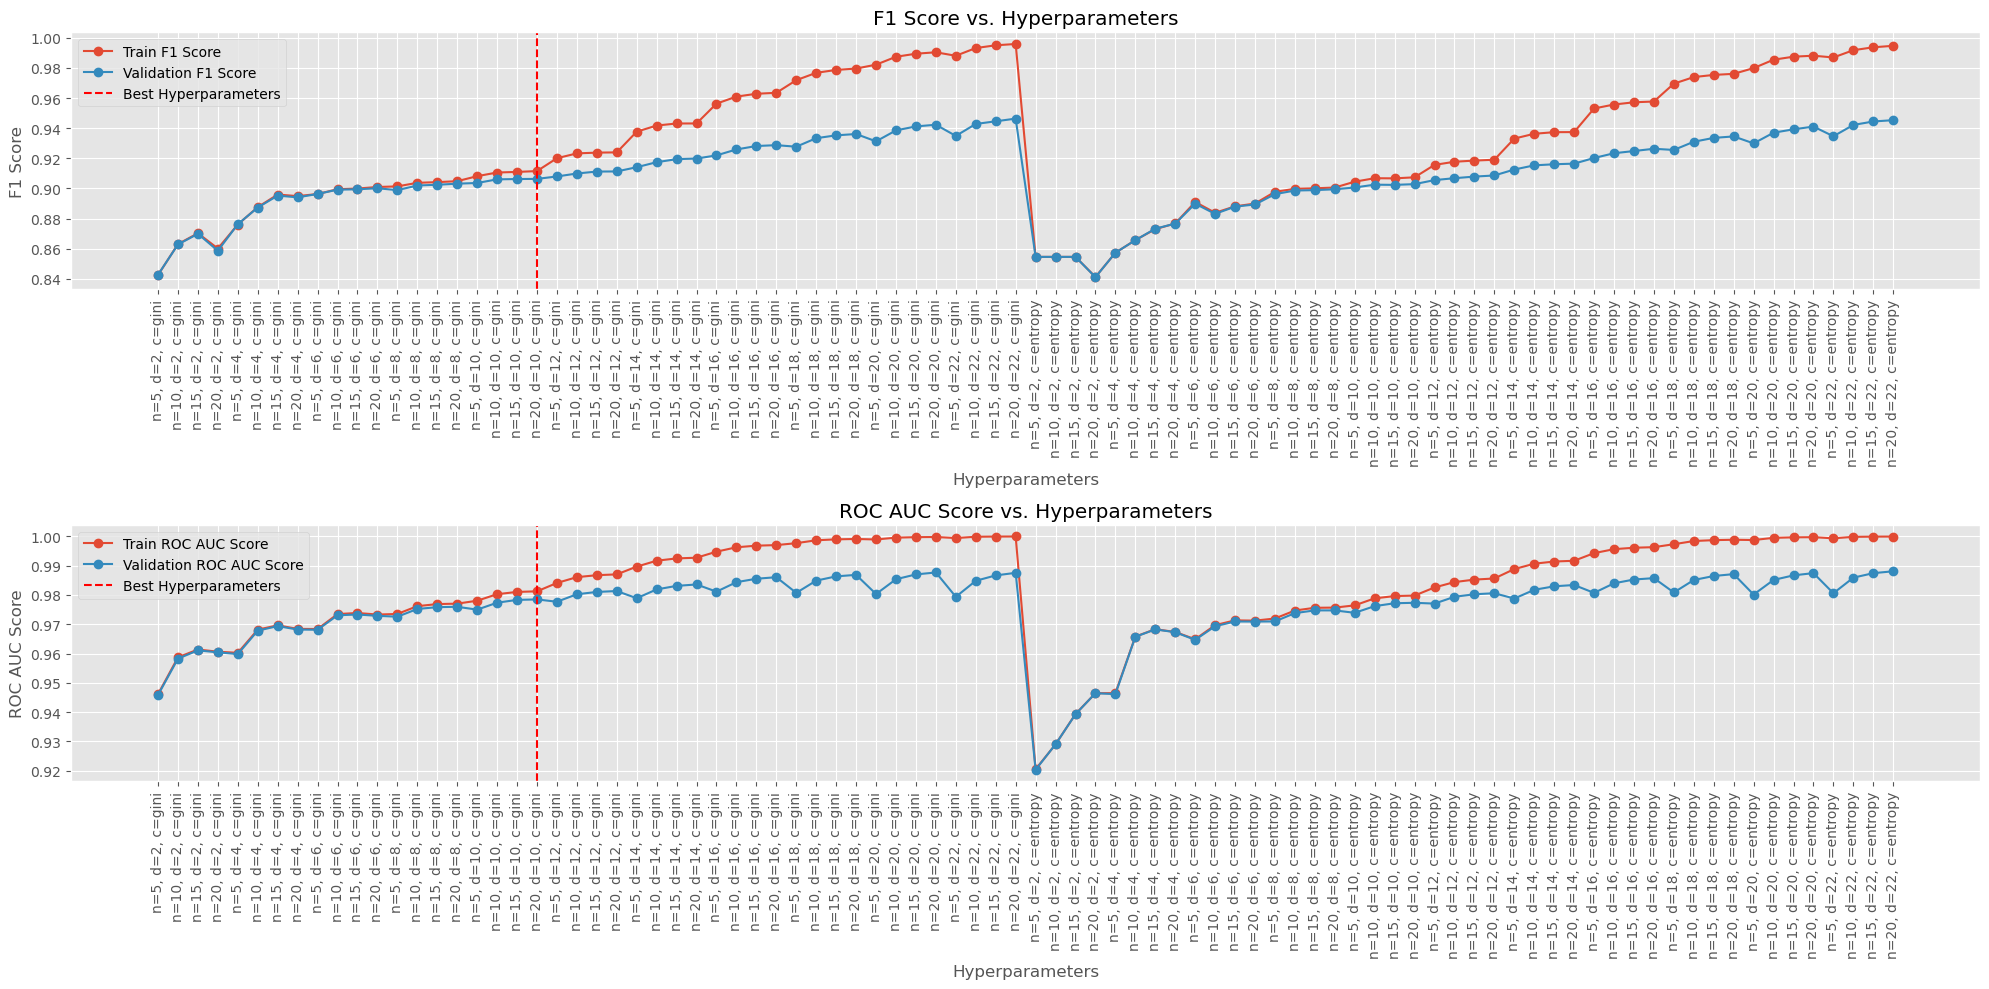

In [76]:
def visualize_cls(grid_clf):
    # Extracting the results from grid search
    train_f1_scores = grid_clf.cv_results_['mean_train_f1']
    val_f1_scores = grid_clf.cv_results_['mean_test_f1']
    train_roc_auc_scores = grid_clf.cv_results_['mean_train_roc_auc']
    val_roc_auc_scores = grid_clf.cv_results_['mean_test_roc_auc']
    hyper_params = grid_clf.cv_results_['params']

    # Calculate the absolute difference between train and validation scores
    score_diff = np.abs(train_f1_scores - val_f1_scores)

    # Define thresholds for score and gap
    score_threshold = 0.8  
    gap_threshold = 0.01 

    # Find the index where the validation score is above the threshold and gap is below the threshold
    candidate_indices = np.where((val_f1_scores > score_threshold) & (score_diff < gap_threshold))[0]

    # Choose the hyperparameters with the highest validation F1 score among the candidates
    best_index = candidate_indices[np.argmax(val_f1_scores[candidate_indices])]
    best_params = hyper_params[best_index]

    hyper_param_labels = [f"n={param['n_estimators']}, d={param['max_depth']}, c={param['criterion']}" for param in hyper_params]

    print("Params with highest score:", grid_clf.best_params_)
    print("Params with best score and smallest gap:", best_params)
    print("Train score with best parameters:", train_f1_scores[best_index])
    print("Validation score with best parameters:", val_f1_scores[best_index])

    # Plotting F1 scores
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(hyper_params)), train_f1_scores, label='Train F1 Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_f1_scores, label='Validation F1 Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=best_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    # Plotting ROC AUC scores
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(hyper_params)), train_roc_auc_scores, label='Train ROC AUC Score', marker='o')
    plt.plot(np.arange(len(hyper_params)), val_roc_auc_scores, label='Validation ROC AUC Score', marker='o')
    plt.xlabel('Hyperparameters')
    plt.ylabel('ROC AUC Score')
    plt.title('ROC AUC Score vs. Hyperparameters')
    plt.xticks(np.arange(len(hyper_params)), hyper_param_labels, rotation=90)
    plt.axvline(x=best_index, color='r', linestyle='--', label='Best Hyperparameters')
    plt.legend()

    plt.tight_layout()
    plt.show()

visualize_cls(grid_clf)

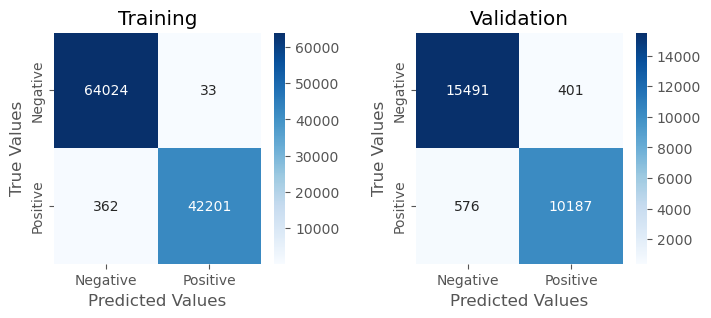

Training Dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64057
           1       1.00      0.99      1.00     42563

    accuracy                           1.00    106620
   macro avg       1.00      1.00      1.00    106620
weighted avg       1.00      1.00      1.00    106620

Validation Dataset
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15892
           1       0.96      0.95      0.95     10763

    accuracy                           0.96     26655
   macro avg       0.96      0.96      0.96     26655
weighted avg       0.96      0.96      0.96     26655



In [77]:
show_train_val_confusion_matrix(y_train, y_train_pred, y_val, y_val_pred)

Model                 AUC        F1
-----------------------------------
decision_tree     0.94926   0.92799
random_forest     0.99052   0.95424


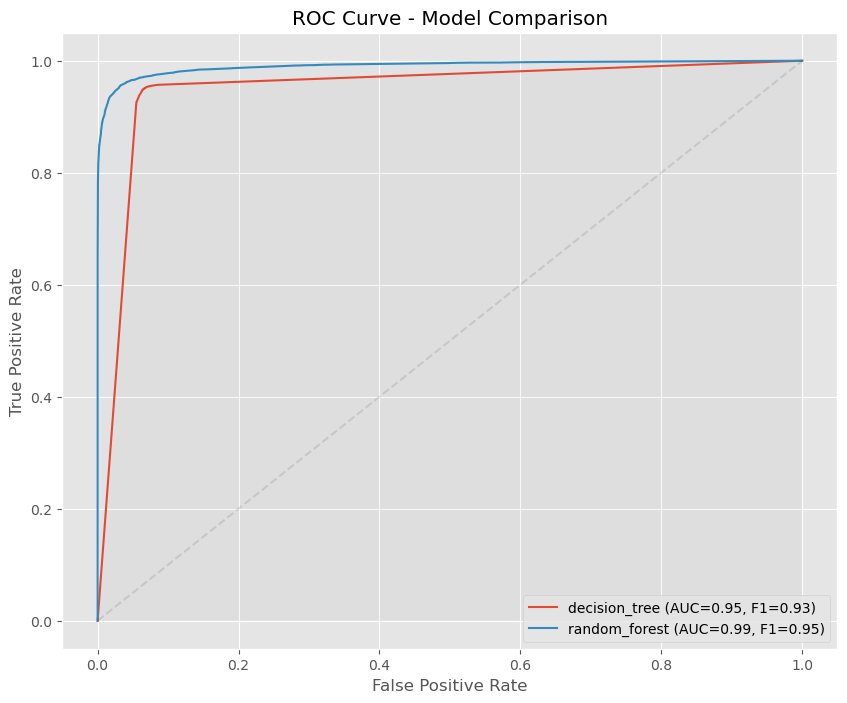

FileNotFoundError: [Errno 2] No such file or directory: '../images/ModelDev_ROC_AUC_Compare.png'

In [82]:
fig, axis = plt.subplots(figsize=(10, 8))

print(f"{'Model':15}{'AUC':>10}{'F1':>10}")
print("-" * 35)
for name, clf in clfs_perf.items():
    if name == "log_reg_2":
        prob_y = clf.predict_proba(x_val_poly_2)[:, 1]
        pred_y = clf.predict(x_val_poly_2)
    else:
        prob_y = clf.predict_proba(x_val)[:, 1]
        pred_y = clf.predict(x_val)

    fpr, tpr, thresholds = roc_curve(y_val, prob_y)
    roc_auc = auc(fpr, tpr)
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC={roc_auc:.2f}, F1={f1_score(y_val, pred_y):.2f})", ax=axis)
    plt.fill_between(fpr, tpr, alpha=0.024)
    print(f"{name:15}{roc_auc:10.5f}{f1_score(y_val, pred_y):10.5f}")


plt.plot([0, 1], [0, 1], linestyle="--", color="black", alpha=0.1)
axis.set_xlabel("False Positive Rate")
axis.set_ylabel("True Positive Rate")
axis.set_title("ROC Curve - Model Comparison")
axis.legend()

plt.show()
fig.savefig("../images/ModelDev_ROC_AUC_Compare.png", dpi=300)